In [5]:
import sys
sys.path.append("/Users/dorisv/Documents/imaging_behavior")
sys.path.append("C:\Users\dorisv\Desktop\Shawn's data")

try:
    import aibs
except:
    import aibs
    
from aibs.dev.shawndev import FileTools
from aibs.dev.shawndev.BehaviorEvents import BehaviorEvents
from aibs.Analysis.InDevelopment import ForageSession
from aibs.dev.shawndev import Forage, Psychometrics, ForageTools, FileTools
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
pd.set_option('display.notebook_repr_html',True)
pd.set_option('display.width', 200)
pd.set_option('display.max_rows', 30)
pd.set_option('display.notebook_repr_html',True)
%matplotlib inline
import matplotlib
import os
from scipy.misc import comb
import scipy.stats

import imaging_behavior as im
import imaging_behavior.plotting.plotting_functions as pf
import imaging_behavior.plotting.utilities as pu
from aibs.Analysis.Core import smooth

from scipy.optimize import minimize
from scipy.optimize import basinhopping
import math
from math import log
from numpy import linalg as LA

In [6]:
#load data
import io
from IPython.nbformat import current

def execute_notebook(nbfile):
    
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    
    ip = get_ipython()
    
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)

C:\Anaconda\lib\site-packages\IPython\nbformat\current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)


In [7]:
%%capture capt
execute_notebook("C:\Users\dorisv\Desktop\Shawn's data\Object recognition - Running speed from behavioral log file.ipynb")

,Image,Ori,PosY,Size,abs_reward_rate,average_speed,duration,end_frame,end_time,first_lick_latency_0,...,lick_times_1,mouse_id,number_of_licks_0,number_of_licks_1,number_of_rewards,reward_times,start_date_time,start_frame,start_time,stop_date_time
0,bird,-15,0,550,1.408580,54.905943,1.742769,104,1.742769,NaN,...,[],M130587,0,0,0,[],2014-10-03 13:29:50.625000,0,0.000000,2014-10-03 14:49:45.315000
1,bird,0,0,400,1.408580,74.060865,1.182906,175,2.925675,NaN,...,[],M130587,0,0,0,[],2014-10-03 13:29:50.625000,105,1.742769,2014-10-03 14:49:45.315000
2,bird,-15,0,550,1.373647,75.229013,1.250163,250,4.175839,NaN,...,[],M130587,0,0,0,[],2014-10-03 13:29:50.625000,176,2.925675,2014-10-03 14:49:45.315000
3,bird,0,0,350,1.317835,45.388544,3.349858,451,7.525696,NaN,...,[],M130587,0,0,0,[],2014-10-03 13:29:50.625000,251,4.175839,2014-10-03 14:49:45.315000
4,bird,45,0,550,1.261059,25.822834,5.015883,752,12.541580,NaN,...,[],M130587,0,0,0,[],2014-10-03 13:29:50.625000,452,7.525696,2014-10-03 14:49:45.315000
5,bird,0,0,450,1.214683,84.197297,1.483320,841,14.024900,NaN,...,[],M130587,0,0,0,[],2014-10-03 13:29:50.625000,753,12.541580,2014-10-03 14:49:45.315000
6,bird,45,0,550,1.167418,70.252978,2.033290,963,16.058190,NaN,...,[],M130587,0,0,0,[],2014-10-03 13:29:50.625000,842,14.024900,2014-10-03 14:49:45.315000
7,bird,-15,0,600,1.084758,63.358064,2.100066,1089,18.158257,NaN,...,[],M130587,0,0,0,[],2014-10-03 13:29:50.625000,964,16.058190,2014-10-03 14:49:45.315000
8,bird,45,0,400,1.052723,36.910872,4.915870,1384,23.074127,NaN,...,[],M130587,0,0,0,[],2014-10-03 13:29:50.625000,1090,18.158257,2014-10-03 14:49:45.315000
9,bird,-15,0,400,1.015602,51.740277,2.800250,1552,25.874377,NaN,...,[],M130587,0,0,0,[],2014-10-03 13:29:50.625000,1385,23.074127,2014-10-03 14:49:45.315000


,Size,Image,Ori,PosY,trial,time,terraincode,pausetime,choice,selectiontime,istarget,speed,lapdistance,timebeforezone,slowing_f,mouse,date
0,400,bird,0,0,1,1.840244,53,0.267095,False,1,False,2152.301946,3937,0.099917,1.151120,M130587,2014-10-03 13:29:50.625000
1,550,bird,-15,0,2,3.024151,36,0.268031,False,1,False,2155.681332,2455,0.100434,0.995480,M130587,2014-10-03 13:29:50.625000
2,350,bird,0,0,3,4.273621,54,0.399960,False,1,False,1231.647159,2661,0.115117,1.148952,M130587,2014-10-03 13:29:50.625000
3,550,bird,45,0,4,7.623390,92,0.667990,False,1,False,1416.589407,4376,0.200129,11.667522,M130587,2014-10-03 13:29:50.625000
4,450,bird,0,0,5,12.638539,52,0.232075,False,1,False,2709.459253,3349,0.115528,0.995757,M130587,2014-10-03 13:29:50.625000
5,550,bird,45,0,6,14.122473,92,0.249965,False,1,False,1959.213561,3544,0.083261,1.200958,M130587,2014-10-03 13:29:50.625000
6,600,bird,-15,0,7,16.155746,35,0.314834,False,1,False,1996.971224,4097,0.150395,0.997373,M130587,2014-10-03 13:29:50.625000
7,400,bird,45,0,8,18.256180,95,0.832834,False,1,False,1103.000564,3796,0.132865,1.263148,M130587,2014-10-03 13:29:50.625000
8,400,bird,-15,0,9,23.172326,39,0.384844,False,1,False,1537.117166,5221,0.150351,0.998283,M130587,2014-10-03 13:29:50.625000
9,400,mushroom,15,0,10,25.971682,60,2.282713,True,1,True,1009.442921,4172,0.165107,1.319022,M130587,2014-10-03 13:29:50.625000


(-10, 90)

In [134]:
sizes = np.sort(dataFrame.Size.unique())
orientations = np.sort(dataFrame.Ori.unique())

#for the purposes of the experiment, should be m=n=7
m = len(sizes)
n = len(orientations)

evenTest1 = isinstance((m/float(2)), (int, long))
evenTest2 = isinstance((n/float(2)), (int, long))
    
if evenTest1:
    s_T = sizes[m/2-1]
else:
    s_T = sizes[m/2]
        
if evenTest2:
    o_T = orientations[n/2-1]    
else:
    o_T = orientations[n/2]
                
s_max = sizes[m-1]

print dataFrame.columns
print dataFrame.mouse_id.unique()
#dataFrame[dataFrame.Image==]

dataFrame.Image[dataFrame.Image == "CoxImage1.png"] = "mushroom"
dataFrame.Image[dataFrame.Image == "CoxImage2.png"] = "bird"

N = len(dataFrame)
print N

N_m = len(dataFrame.Image[dataFrame.Image=="mushroom"])
N_b = len(dataFrame.Image[dataFrame.Image=="bird"])
print N_m, N_b

dataFrame["total_trial_ind"] = range(0, len(dataFrame))
dataFrame.head()

Index([u'Image', u'Ori', u'PosY', u'Size', u'abs_reward_rate', u'duration', u'end_frame', u'end_time', u'first_lick_latency_0', u'first_lick_latency_1', u'image', u'jcam_end_ind_exclusive', u'jcam_start_ind', u'lap_number', u'lick_duration_0', u'lick_duration_1', u'lick_times_0', u'lick_times_1', u'mouse_id', u'number_of_licks_0', u'number_of_licks_1', u'number_of_rewards', u'reward_times', u'start_date_time', u'start_frame', u'start_time', u'stop_date_time', u'choice', u'total_trial_ind'], dtype='object')
['M143454']
747
282 465


,Image,Ori,PosY,Size,abs_reward_rate,duration,end_frame,end_time,first_lick_latency_0,first_lick_latency_1,...,number_of_licks_0,number_of_licks_1,number_of_rewards,reward_times,start_date_time,start_frame,start_time,stop_date_time,choice,total_trial_ind
1,bird,-15,0,500,1.786181,3.449961,390,6.549960,NaN,None,...,0,0,0,[],2014-10-27 12:54:41.393000,185,3.099999,2014-10-27 14:05:33.684000,True,0
2,mushroom,-30,0,400,1.600021,6.633207,788,13.183167,1.649916,None,...,5,0,1,[8.74988234113],2014-10-27 12:54:41.393000,391,6.549960,2014-10-27 14:05:33.684000,False,1
3,bird,45,0,400,1.552413,3.216621,980,16.399788,NaN,None,...,0,0,0,[],2014-10-27 12:54:41.393000,789,13.183167,2014-10-27 14:05:33.684000,True,2
4,mushroom,0,0,550,2.169573,6.249905,1355,22.649692,1.016686,None,...,24,0,1,[18.4498032981],2014-10-27 12:54:41.393000,981,16.399788,2014-10-27 14:05:33.684000,True,3
5,bird,45,0,500,2.720092,8.333357,1854,30.983049,1.200000,None,...,15,0,0,[],2014-10-27 12:54:41.393000,1356,22.649692,2014-10-27 14:05:33.684000,False,4


In [135]:
def p_real(j):
    
    dataFrame = dataFrame_list[j]
            
    p_m_real = np.zeros((len(orientations),len(sizes)))
    p_b_real = np.zeros((len(orientations),len(sizes)))
    trials_tot = np.zeros((len(orientations),len(sizes)))
    trials_stop = np.zeros((len(orientations),len(sizes)))
    trials_m = np.zeros((len(orientations),len(sizes)))
    trials_b = np.zeros((len(orientations),len(sizes)))
    trials_stop_m = np.zeros((len(orientations),len(sizes)))
    trials_stop_b = np.zeros((len(orientations),len(sizes)))
    correct_m = np.zeros((len(orientations), len(sizes)))
    correct_b = np.zeros((len(orientations), len(sizes)))

    for ind2,o in enumerate(orientations):
        for ind1,s in enumerate(sizes):
            
            trials_tot[ind2,ind1] = len(dataFrame[(dataFrame.Size==s)&(dataFrame.Ori==o)].total_trial_ind)
            #print ind1, ind2, trials_tot[ind2,ind1]
            trials_stop[ind2,ind1] = len(dataFrame[(dataFrame.Size==s)&(dataFrame.Ori==o)&(dataFrame.choice==1)].total_trial_ind)

            trials_m[ind2,ind1] = len(dataFrame[(dataFrame.Size==s)&(dataFrame.Ori==o)&(dataFrame.Image=='mushroom')].total_trial_ind)
            trials_b[ind2,ind1] = len(dataFrame[(dataFrame.Size==s)&(dataFrame.Ori==o)&(dataFrame.Image=='bird')].total_trial_ind)   
            
            trials_stop_m[ind2,ind1] = len(dataFrame[(dataFrame.Size==s)&(dataFrame.Ori==o)&(dataFrame.Image=='mushroom')&(dataFrame.choice==1)].total_trial_ind)
            trials_stop_b[ind2,ind1] = len(dataFrame[(dataFrame.Size==s)&(dataFrame.Ori==o)&(dataFrame.Image=='bird')&(dataFrame.choice==1)].total_trial_ind)   
            
            p_m_real[ind2, ind1] = trials_m[ind2,ind1]/trials_tot[ind2,ind1]
            p_b_real[ind2, ind1] = trials_b[ind2,ind1]/trials_tot[ind2,ind1]   
            
            correct_m[ind2, ind1] = len(dataFrame.total_trial_ind[(dataFrame.Size==s) & (dataFrame.Ori==o) & (dataFrame.Image=="mushroom") & (dataFrame.choice == 1)])/trials_m[ind2,ind1]
            correct_b[ind2, ind1] = len(dataFrame.total_trial_ind[(dataFrame.Size==s) & (dataFrame.Ori==o) & (dataFrame.Image=="bird") & (dataFrame.choice == 0)])/trials_b[ind2,ind1]
          
    return p_m_real, p_b_real, trials_tot, trials_stop, trials_m, trials_b, trials_stop_m, trials_stop_b, correct_m, correct_b

In [51]:
type(good_ones)
good_ones[1]

2

[[ 0.5         0.46153846  0.33333333  0.35714286  0.44444444  0.73333333
   0.125     ]
 [ 0.5         0.6         0.3         0.46666667  0.25        0.38461538
   0.54545455]
 [ 0.16666667  0.3         0.25        0.14285714  0.27272727  0.22222222
   0.33333333]
 [ 0.25        0.36363636  0.4         0.5         0.125       0.28571429
   0.26666667]
 [ 0.61111111  0.33333333  0.42857143  0.16666667  0.25        0.14285714
   0.5       ]
 [ 0.1         0.61538462  0.375       0.33333333  0.16666667  0.125
   0.58333333]
 [ 0.35714286  0.4         0.33333333  0.28571429  0.21428571  0.
   0.35714286]]
[[ 0.8         0.72727273  0.81818182  0.46666667  0.57142857  0.48        0.4       ]
 [ 0.70588235  0.66666667  0.35714286  0.64285714  0.46153846  0.63636364
   1.        ]
 [ 0.56521739  0.5         0.44444444  0.46153846  0.57142857  0.4         0.4       ]
 [ 0.66666667  0.71428571  0.46153846  0.54166667  0.44444444  0.61111111
   0.46666667]
 [ 0.6875      0.52631579  0.58823529

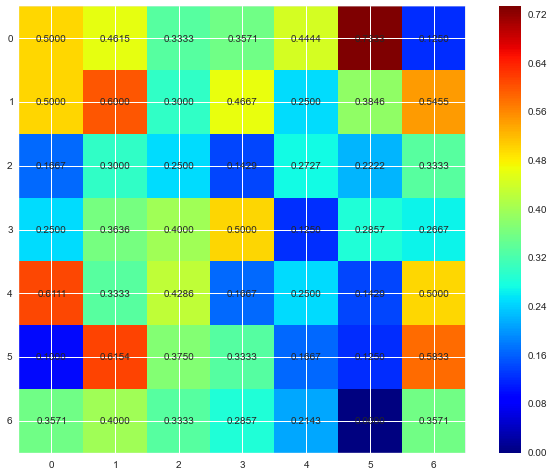

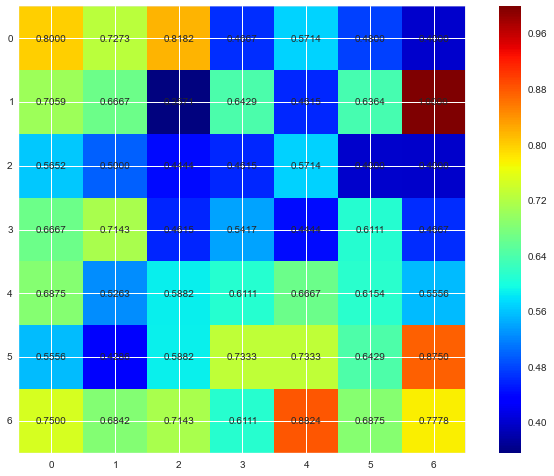

mushroom 0.337943462433 0.156343684069
bird 0.610161279427 0.140883467857
mushroom 0.486111111111 0.139172046958
bird 0.491134036032 0.119476916815
mushroom 0.373242630385 0.130118429056
bird 0.592905733722 0.114589499268
mushroom 0.402696793003 0.15563571354
bird 0.482745825603 0.139672229107
mushroom 0.662779397473 0.185824326297
bird 0.403896103896 0.143163779527
mushroom 0.342970521542 0.132749930714
bird 0.553244374673 0.125596191779
mushroom 0.847424684159 0.148489421886
bird 0.18556998557 0.128906477702
mushroom 0.271036899608 0.162722121341
bird 0.602818270165 0.100311506892
mushroom 0.855685131195 0.141343467903
bird 0.184353741497 0.13142854013
mushroom 0.448412698413 0.18082789508
bird 0.565184815185 0.128781663134
mushroom 0.759475218659 0.174516308468
bird 0.331292517007 0.152623376432
mushroom 0.684766763848 0.174686271277
bird 0.360379303236 0.179661070139
mushroom 0.544946550049 0.191048782617
bird 0.423933209647 0.139429554884
mushroom 0.321145124717 0.175987313447
bir

In [136]:
p_m_real, p_b_real, trials_tot, trials_stop, trials_m, trials_b, trials_stop_m, trials_stop_b, correct_m, correct_b = p_real(1)

#print trials_stop_m/trials_m, trials_stop_b/trials_b
#print sum(sum(trials_stop_m/trials_m > trials_stop_b/trials_b))

print correct_m
print correct_b

fig = plt.figure(figsize=(12, 8))
plt.imshow(correct_m, interpolation = 'none')
plt.jet()
plt.colorbar()

for y in range(correct_m.shape[0]):
    for x in range(correct_m.shape[1]):
        plt.text(x, y, '%.4f' % correct_m[y, x],
                 horizontalalignment='center',
                 verticalalignment='center',
                 )

plt.show()

fig = plt.figure(figsize=(12, 8))
plt.imshow(correct_b, interpolation = 'none')
plt.colorbar()

for y in range(correct_b.shape[0]):
    for x in range(correct_b.shape[1]):
        plt.text(x, y, '%.4f' % correct_b[y, x],
                 horizontalalignment='center',
                 verticalalignment='center',
                 )

plt.show()

for j in good_ones:
    p_m_real, p_b_real, trials_tot, trials_stop, trials_m, trials_b, trials_stop_m, trials_stop_b, correct_m, correct_b = p_real(j)
    print "mushroom", np.mean(correct_m), np.std(correct_m)
    print "bird", np.mean(correct_b), np.std(correct_b)

sum 23
sum 27
sum 19
sum 14
sum 28
sum 12
sum 28
sum 11
sum 28
sum 27
sum 33
sum 28
sum 23
sum 17
sum 23
sum 19
sum 23
sum 21
sum 19
sum 32
sum 21
sum 26
sum 35
sum 24
sum 18
sum 30
sum 24
sum 26
sum 13
sum 21
[[ 5.  4.  6.  4.  6.  4.  2.]
 [ 3.  4.  3.  5.  5.  5.  5.]
 [ 3.  5.  4.  5.  5.  4.  4.]
 [ 5.  2.  4.  6.  6.  6.  6.]
 [ 5.  5.  6.  3.  4.  3.  2.]
 [ 6.  4.  7.  4.  5.  3.  2.]
 [ 5.  5.  7.  4.  6.  5.  5.]] [[ 5.  7.  5.  9.  5.  5.  4.]
 [ 6.  6.  7.  6.  5.  8.  3.]
 [ 8.  9.  6.  6.  7.  6.  7.]
 [ 8.  7.  7.  8.  5.  9.  7.]
 [ 7.  9.  5.  6.  8.  4.  7.]
 [ 5.  7.  6.  8.  6.  5.  7.]
 [ 6.  6.  8.  6.  7.  4.  6.]]
[[ 0.625       0.5         0.75        0.5         0.75        0.5         0.25      ]
 [ 0.375       0.5         0.375       0.625       0.71428571  0.71428571
   0.625     ]
 [ 0.375       0.625       0.5         0.625       0.71428571  0.5
   0.57142857]
 [ 0.625       0.25        0.57142857  0.75        0.75        0.75        0.75      ]
 [ 0.625 

<matplotlib.colorbar.Colorbar instance at 0x00000000236C7848>

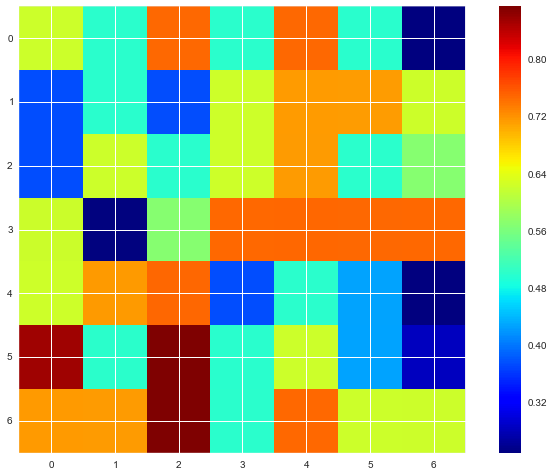

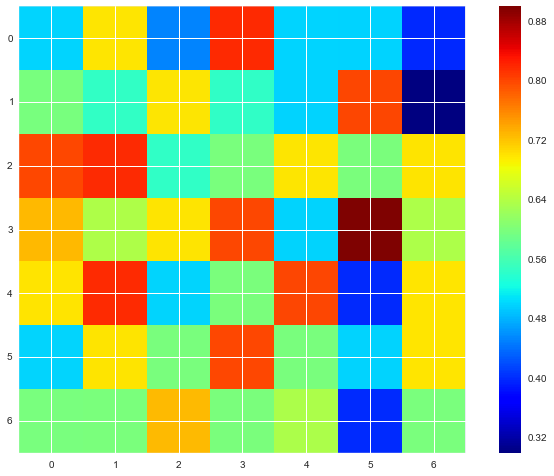

In [53]:
for j in good_ones:
    
    p_m_real, p_b_real, trials_tot, trials_stop, trials_m, trials_b, trials_stop_m, trials_stop_b, choice_m, choice_b = p_real(j)
    print "sum", np.sum(np.sum(trials_stop_m/trials_m > trials_stop_b/trials_b))
    
#print p_m_real, p_b_real
#print trials_tot, trials_stop
#print trials_m, trials_b
print trials_stop_m, trials_stop_b

print trials_stop_m/trials_m
print trials_stop_b/trials_b

print "sum", np.sum(np.sum(trials_stop_m/trials_m > trials_stop_b/trials_b))

fig = plt.figure(figsize=(12, 8))
plt.imshow(trials_stop_m/trials_m, interpolation = 'none')
plt.colorbar()

fig = plt.figure(figsize=(12, 8))
plt.imshow(trials_stop_b/trials_b, interpolation = 'none')
plt.colorbar()

In [137]:
p_m_real, p_b_real, trials_tot, trials_stop, trials_m, trials_b, trials_stop_m, trials_stop_b, choice_m, choice_b = p_real(0)
print trials_m, trials_b
print sum(sum((trials_m/trials_b>1)==True))
print sum(sum(trials_m))
print sum(sum(trials_b))

print len(dataFrame_list[0])
print len(dataFrame_list[0][dataFrame_list[0].choice==np.nan].total_trial_ind)
#print sum(np.isnan(dataFrame_list[0].choice))
print "sum of choices", sum(dataFrame_list[0].choice)

nan_number = 0
start_index = 0
j = 1
for i in range(0, len(dataFrame_list[j])):
    #print dataFrame_list[0].choice.iloc[i]
    if np.isnan(dataFrame_list[j].choice.iloc[i]):
        nan_number = nan_number + 1
        if nan_number == 1:
            start_index = i
        
print len(dataFrame_list[j]), nan_number, start_index

print dataFrame_list[j].choice

[[ 23.  10.  10.  12.  15.  11.  11.]
 [ 14.  12.  10.  14.  11.  13.  10.]
 [ 11.  13.  10.  13.  11.  15.  11.]
 [  8.  12.  12.  16.  10.   7.  16.]
 [  8.  12.   9.  14.   9.  11.  15.]
 [ 20.  15.  14.  10.  10.  13.  20.]
 [  6.  16.   6.  13.  13.  12.  17.]] [[ 19.  13.  18.  22.  19.  13.  15.]
 [ 19.  23.  16.  18.  17.  19.  22.]
 [ 19.  16.  23.  16.  19.  25.  18.]
 [ 20.  14.   8.  18.  14.  19.  18.]
 [ 31.  13.  14.  16.  14.  21.  19.]
 [ 19.  26.  21.  15.  24.  12.  19.]
 [ 14.  22.  19.  11.  17.  17.  19.]]
6
604.0
883.0
1487
0
sum of choices nan
1289 1 1288
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9      True
10    False
11     True
12    False
13    False
...
1277    False
1278    False
1279    False
1280    False
1281    False
1282    False
1283     True
1284     True
1285    False
1286    False
1287     True
1288     True
1289      NaN
Name: choice, Length: 1289, dtype: object


In [126]:
def p_stop_real_function(j):
            
    p_stop_real = np.zeros((len(orientations),len(sizes)))
    p_stop_real_toFit = np.zeros((len(orientations),len(sizes)))
    p_stop_real_toFit2 = np.zeros((len(orientations),len(sizes)))
    p_stop_real_givenM = np.zeros((len(orientations),len(sizes)))
    p_stop_real_givenB = np.zeros((len(orientations),len(sizes)))
    p_stop_real_givenM2 = np.zeros((len(orientations),len(sizes)))
    p_stop_real_givenB2 = np.zeros((len(orientations),len(sizes)))
    p_stop_real_givenM_toFit = np.zeros((len(orientations),len(sizes)))
    p_stop_real_givenB_toFit = np.zeros((len(orientations),len(sizes)))
    p_stop_real_givenM_toFit2 = np.zeros((len(orientations),len(sizes)))
    p_stop_real_givenB_toFit2 = np.zeros((len(orientations),len(sizes)))
    
    p_m_real, p_b_real, trials_tot, trials_stop, trials_m, trials_b, trials_stop_m, trials_stop_b, choice_m, choice_b  = p_real(j)
    
    for ind2,o in enumerate(orientations):
        for ind1,s in enumerate(sizes):
            
            p_stop_real[ind2,ind1] = trials_stop[ind2, ind1]/trials_tot[ind2,ind1]
            p_stop_real_givenM[ind2,ind1] = trials_stop_m[ind2, ind1]/trials_m[ind2,ind1]
            p_stop_real_givenB[ind2,ind1] = trials_stop_b[ind2,ind1]/trials_b[ind2,ind1]
        
            p_stop_real_toFit[ind2,ind1]  = (p_stop_real[ind2,ind1]-p_m_real[ind2,ind1])/(p_b_real[ind2,ind1]-p_m_real[ind2,ind1])            
            p_stop_real_givenM_toFit[ind2,ind1]  = 1-p_stop_real_givenM[ind2,ind1]
            p_stop_real_givenB_toFit[ind2,ind1] = p_stop_real_givenB[ind2,ind1]
            
    return p_stop_real, p_stop_real_toFit, p_stop_real_givenM, p_stop_real_givenB, p_stop_real_givenM_toFit, p_stop_real_givenB_toFit 

In [57]:
p_stop_real, p_stop_real_toFit, p_stop_real_givenM, p_stop_real_givenB, p_stop_real_givenM_toFit, p_stop_real_givenB_toFit = p_stop_real_function(2)
#rint p_stop_real_givenB_toFit
#rint p_stop_real_givenM
#sum(sum((p_stop_real_givenB_toFit>p_stop_real_givenM)==True))
print trials_stop_m
print trials_stop_b
print sum(sum((p_stop_real_givenM > p_stop_real_givenB)==True))

[[ 5.  4.  6.  4.  6.  4.  2.]
 [ 3.  4.  3.  5.  5.  5.  5.]
 [ 3.  5.  4.  5.  5.  4.  4.]
 [ 5.  2.  4.  6.  6.  6.  6.]
 [ 5.  5.  6.  3.  4.  3.  2.]
 [ 6.  4.  7.  4.  5.  3.  2.]
 [ 5.  5.  7.  4.  6.  5.  5.]]
[[ 5.  7.  5.  9.  5.  5.  4.]
 [ 6.  6.  7.  6.  5.  8.  3.]
 [ 8.  9.  6.  6.  7.  6.  7.]
 [ 8.  7.  7.  8.  5.  9.  7.]
 [ 7.  9.  5.  6.  8.  4.  7.]
 [ 5.  7.  6.  8.  6.  5.  7.]
 [ 6.  6.  8.  6.  7.  4.  6.]]
27


In [58]:
def p_stop_ProbabilityMatching(x,j):
    
    dataFrame = dataFrame_list[j]
        
    p_stop_model1 = np.zeros((len(orientations),len(sizes)))
    p_stop_givenM_model = np.zeros((len(orientations),len(sizes)))
    p_stop_givenB_model = np.zeros((len(orientations),len(sizes)))
    
    prob_misID = probability_misidentify(x)
    p_m_real, p_b_real, trials_tot, trials_stop, trials_m, trials_b, trials_stop_m, trials_stop_b, choice_m, choice_b = p_real(j)
    
    for ind2,o in enumerate(orientations):
        for ind1,s in enumerate(sizes):
                
            p_stop_model1[ind2,ind1] = (1-prob_misID[ind2,ind1])*p_m_real[ind2,ind1]+prob_misID[ind2,ind1]*p_b_real[ind2,ind1]
            p_stop_givenM_model[ind2,ind1] = 1-prob_misID[ind2,ind1]
            p_stop_givenB_model[ind2,ind1] = prob_misID[ind2,ind1]
            
    return p_stop_model1, p_stop_givenM_model, p_stop_givenB_model

In [59]:
def probability_misidentify(x):
    
    #parameters of the model
    #k_s = x[0]
    #k_o = x[1]
    #k_d = x[2]    
    #alpha = x[3]
    alpha = x[0]
    k_o = x[1]
    k_s = x[2]
    k_d = x[3]
    x_0 = 1
    
    print alpha, k_o, k_s, k_d
    
    #probabilities of misidentification, from which we infer p-stop. The prob_misID depend on s,o, s_T,o_T
    prob_misID = np.zeros((len(orientations), len(sizes)))
    
    for ind2,o in enumerate(orientations):
        for ind1,s in enumerate(sizes):               
                    #our model for prob_msID is a hill function
            
            if s!=0:
                prob_misID[ind2,ind1] = 0.5*1/(1+x_0/(k_s*math.fabs(s-s_T)+k_o*math.fabs(o-o_T)+k_d*(s_max-s)+alpha))
                #prob_misID[ind2,ind1] = k_s*math.fabs(s-s_T)+k_o*math.fabs(o-o_T)+k_d*(s_max-s)+alpha
            else:
                prob_misID[ind2,ind1] = 0.5
                 #another version of the model   
                #prob_misID[i,ind1,ind2] = 0.5*1/(1+x_0/(k_s*math.fabs(s-s_T)+k_o*math.fabs(o-o_T)+k_d*math.fabs*(s_max-s)+alpha))
    
    return prob_misID

In [64]:
def fitting_probMatching(x):
        
        p_stop_real, p_stop_real_toFit, p_stop_real_givenM, p_stop_real_givenB, p_stop_real_givenM_toFit, p_stop_real_givenB_toFit = p_stop_real_function(j)
        p_m_real, p_b_real, trials_tot, trials_stop, trials_m, trials_b, trials_stop_m, trials_stop_b, choice_m, choice_b = p_real(j) 
        
        p_base, p_stop_givenM_model, p_stop_givenB_model = p_stop_ProbabilityMatching(x,j)
        mle = 0
        
        #print "1", p_stop_real, p_stop_real_toFit, p_stop_real_givenM, p_stop_real_givenB, p_stop_real_givenM_toFit, p_stop_real_givenB_toFit
        #print "2", p_m_real, p_b_real, trials_tot, trials_stop, trials_m, trials_b, trials_stop_m, trials_stop_b
        #print "3", p_base, p_stop_givenM_model, p_stop_givenB_model
        
        #print "x", x
        
        for ind2,o in enumerate(orientations):
            for ind1,s in enumerate(sizes): 
                if (p_stop_givenM_model[ind2,ind1]>0) and (p_stop_givenB_model[ind2,ind1]>0) and (p_stop_givenM_model[ind2,ind1] < 1) and (p_stop_givenB_model[ind2,ind1]< 1):                    
                    mle = mle + trials_stop_m[ind2,ind1]*math.log(p_stop_givenM_model[ind2,ind1])+(trials_m[ind2,ind1]-trials_stop_m[ind2,ind1])*math.log(1-p_stop_givenM_model[ind2,ind1])+trials_stop_b[ind2,ind1]*math.log(p_stop_givenB_model[ind2,ind1])+(trials_b[ind2,ind1]-trials_stop_b[ind2,ind1])*math.log(1-p_stop_givenB_model[ind2,ind1])
                    #print "legit", mle, p_stop_givenM_model[ind2,ind1], p_stop_givenB_model[ind2,ind1]
                else:
                    mle = np.inf
                    #print "non-legit", mle
                    
        #norm = LA.norm(  - p_base, 'fro')
        norm = LA.norm(p_stop_real_givenM-p_stop_givenM_model, 'fro') + LA.norm(p_stop_real_givenB-p_stop_givenB_model, 'fro')
        
        #print norm, -mle
        return -mle

In [61]:
p_stop_model, p_stop_givenM_model, p_stop_givenB_model = p_stop_ProbabilityMatching([results.x[0], results.x[1], results.x[2], results.x[3]], j)
print results.x
print p_stop_givenM_model

NameError: name 'results' is not defined

In [62]:
def fitting_SimpleModel(j):   
    
    print "j", j
    
    # fitting in the case of probability matching
    p_stop_real, p_stop_real_toFit, p_stop_real_givenM, p_stop_real_givenB, p_stop_real_givenM_toFit, p_stop_real_givenB_toFit = p_stop_real_function(j)
    p_m_real, p_b_real, trials_tot, trials_stop, trials_m, trials_b, trials_stop_m, trials_stop_b, choice_m, choice_b = p_real(j) 
    x_initial = [0,0,0,0]

    #print "HERE1", p_stop_real, p_m_real, trials_stop_m
    results = minimize(fitting_probMatching, x_initial, method = 'Nelder-Mead')
    
    p_stop_model, p_stop_givenM_model, p_stop_givenB_model = p_stop_ProbabilityMatching([results.x[0], results.x[1], results.x[2], results.x[3]], j)
    mle=0
    
    #print "HERE2", p_stop_model, p_stop_givenM_model, p_stop_givenB_model
    
    for ind2,o in enumerate(orientations):
        for ind1,s in enumerate(sizes):
                #mle = mle + trials_stop[ind2,ind1]*log(p_stop_model[ind2,ind1])+(trials_tot[ind2,ind1]-trials_stop[ind2,ind1])*log(1-p_stop_model[ind2,ind1])
                if (p_stop_givenM_model[ind2,ind1]>0) and (p_stop_givenB_model[ind2,ind1]>0) and (p_stop_givenM_model[ind2,ind1] < 1) and (p_stop_givenB_model[ind2,ind1]< 1):
                    mle = mle + trials_stop_m[ind2,ind1]*math.log(p_stop_givenM_model[ind2,ind1])+(trials_m[ind2,ind1]-trials_stop_m[ind2,ind1])*math.log(1-p_stop_givenM_model[ind2,ind1])+trials_stop_b[ind2,ind1]*math.log(p_stop_givenB_model[ind2,ind1])+(trials_b[ind2,ind1]-trials_stop_b[ind2,ind1])*math.log(1-p_stop_givenB_model[ind2,ind1])
                else:
                    mle = -np.inf
                    
    #print LA.norm(p_stop_real-p_stop_model, 'fro')
    print "which data frame is analyzed", j
    print LA.norm(p_stop_real - p_m_real*p_stop_givenM_model - p_b_real*p_stop_givenB_model, 'fro')
    print mle
    print "real", p_stop_real
    print "model", p_stop_model
    print "1", p_stop_givenM_model, p_stop_real_givenM
    print "2", p_stop_givenB_model, p_stop_real_givenB
    
    return mle, results

In [17]:
mle = mle + trials_stop_m[ind2,ind1]*math.log(p_stop_givenM_model[ind2,ind1])+(trials_m[ind2,ind1]-trials_stop_m[ind2,ind1])*math.log(1-p_stop_givenM_model[ind2,ind1])+trials_stop_b[ind2,ind1]*math.log(p_stop_givenB_model[ind2,ind1])+(trials_b[ind2,ind1]-trials_stop_b[ind2,ind1])*math.log(1-p_stop_givenB_model[ind2,ind1])

NameError: name 'mle' is not defined

In [126]:
print len(dataFrame_list[5])
print results.x

851
[ 0.00025  0.       0.       0.     ]


In [131]:
[a, b] = fitting_SimpleModel(5)

j 5
0.0 0.0 0.0 0.0
1 [[ 0.6         0.75        0.5625      0.53333333  0.53333333  0.53333333
   0.73333333]
 [ 0.5625      0.4         0.4375      0.73333333  0.6875      0.53333333
   0.71428571]
 [ 0.64285714  0.5625      0.71428571  0.6         0.75        0.71428571
   0.625     ]
 [ 0.5         0.75        0.75        0.75        0.66666667  0.6875      0.4       ]
 [ 0.6875      0.625       0.64285714  0.64285714  0.53333333  0.53333333
   0.57142857]
 [ 0.625       0.73333333  0.5625      0.66666667  0.73333333  0.73333333
   0.73333333]
 [ 0.66666667  0.6         0.625       0.6         0.6         0.86666667
   0.5       ]] [[ 0.8         1.5         0.75        0.66666667  0.66666667  0.66666667
   1.2       ]
 [ 0.75        0.          0.25        1.66666667  1.25        0.66666667
   1.25      ]
 [ 1.          0.75        1.25        1.          1.5         1.25        1.        ]
 [ 0.5         1.5         1.5         1.5         1.33333333  1.25        0.        ]
 [ 1

KeyboardInterrupt: 

In [68]:
results

  status: 1
    nfev: 803
 success: False
     fun: -inf
       x: array([ 0.,  0.,  0.,  0.])
 message: 'Maximum number of function evaluations has been exceeded.'
     nit: 134

In [63]:
result_matrix = np.zeros((len(dataFrame_list), 4))
mle_matrix = np.zeros(len(dataFrame_list))

for j in good_ones[0:1]:
     
    [mle_matrix[j], results] = fitting_SimpleModel(j)
    result_matrix[j, :] = results.x

j 1
0.0 0.0 0.0 0.0
0.00025 0.0 0.0 0.0
0.0 0.00025 0.0 0.0
0.0 0.0 0.00025 0.0
0.0 0.0 0.0 0.00025
-0.00025 0.000125 0.000125 0.000125
-0.000125 9.375e-05 9.375e-05 9.375e-05
0.0 0.000125 0.0 0.0
0.0 0.0 0.000125 0.0
0.0 0.0 0.0 0.000125
0.000125 0.0 0.0 0.0
-0.000125 6.25e-05 6.25e-05 6.25e-05
-6.25e-05 4.6875e-05 4.6875e-05 4.6875e-05
0.0 6.25e-05 0.0 0.0
0.0 0.0 6.25e-05 0.0
0.0 0.0 0.0 6.25e-05
6.25e-05 0.0 0.0 0.0
-6.25e-05 3.125e-05 3.125e-05 3.125e-05
-3.125e-05 2.34375e-05 2.34375e-05 2.34375e-05
0.0 3.125e-05 0.0 0.0
0.0 0.0 3.125e-05 0.0
0.0 0.0 0.0 3.125e-05
3.125e-05 0.0 0.0 0.0
-3.125e-05 1.5625e-05 1.5625e-05 1.5625e-05
-1.5625e-05 1.171875e-05 1.171875e-05 1.171875e-05
0.0 1.5625e-05 0.0 0.0
0.0 0.0 1.5625e-05 0.0
0.0 0.0 0.0 1.5625e-05
1.5625e-05 0.0 0.0 0.0
-1.5625e-05 7.8125e-06 7.8125e-06 7.8125e-06
-7.8125e-06 5.859375e-06 5.859375e-06 5.859375e-06
0.0 7.8125e-06 0.0 0.0
0.0 0.0 7.8125e-06 0.0
0.0 0.0 0.0 7.8125e-06
7.8125e-06 0.0 0.0 0.0
-7.8125e-06 3.90625e-06 3.

In [8]:
    # fitting in the case of probability matching
    p_stop_real, p_stop_real_toFit, p_stop_real_givenM, p_stop_real_givenB, p_stop_real_givenM_toFit, p_stop_real_givenB_toFit = p_stop_real_function(j)
    p_m_real, p_b_real, trials_tot, trials_stop, trials_m, trials_b, trials_stop_m, trials_stop_b, choice_m, choice_b = p_real(j) 
    x_initial = [0,0,0,0]

    results = minimize(fitting_probMatching, x_initial, method = 'Nelder-Mead')
    
    p_stop_model, p_stop_givenM_model, p_stop_givenB_model = p_stop_ProbabilityMatching([results.x[0], results.x[1], results.x[2], results.x[3]], j)
    mle=0
    
    for ind2,o in enumerate(orientations):
        for ind1,s in enumerate(sizes):
                 #mle = mle + trials_stop[ind2,ind1]*log(p_stop_model[ind2,ind1])+(trials_tot[ind2,ind1]-trials_stop[ind2,ind1])*log(1-p_stop_model[ind2,ind1])
                if (p_stop_givenM_model[ind2,ind1]>0) and (p_stop_givenB_model[ind2,ind1]>0) and (p_stop_givenM_model[ind2,ind1] < 1) and (p_stop_givenB_model[ind2,ind1]< 1):
                    mle = mle + trials_stop_m[ind2,ind1]*math.log(p_stop_givenM_model[ind2,ind1])+(trials_m[ind2,ind1]-trials_stop_m[ind2,ind1])*math.log(1-p_stop_givenM_model[ind2,ind1])+trials_stop_b[ind2,ind1]*math.log(p_stop_givenB_model[ind2,ind1])+(trials_b[ind2,ind1]-trials_stop_b[ind2,ind1])*math.log(1-p_stop_givenB_model[ind2,ind1])
                else:
                    print 'Im here'   
                    mle = -np.inf
                    
    #print LA.norm(p_stop_real-p_stop_model, 'fro')
    print LA.norm(p_stop_real - p_m_real*p_stop_givenM_model - p_b_real*p_stop_givenB_model, 'fro')
    print mle
    print "real", p_stop_real
    print "model", p_stop_model
    print "1", p_stop_givenM_model, p_stop_real_givenM
    print "2", p_stop_givenB_model, p_stop_real_givenB

NameError: name 'p_stop_real_function' is not defined

In [98]:
# compute average T1, T0 for each combination (s,o)
def pause_and_laptimes(j):
    
    pausetimes = np.zeros((len(orientations),len(sizes)))
    pausetimes_givenM = np.zeros((len(orientations),len(sizes)))
    pausetimes_givenB = np.zeros((len(orientations),len(sizes)))
    
    laptimes = np.zeros((len(orientations),len(sizes)))
    laptimes_givenM = np.zeros((len(orientations),len(sizes)))
    laptimes_givenB = np.zeros((len(orientations),len(sizes)))
    
    p_Correct_GivenStop = np.zeros((len(orientations),len(sizes)))

    p_m_real, p_b_real, trials_tot, trials_stop, trials_m, trials_b, trials_stop_m, trials_stop_b, choice_m, choice_b = p_real(j)
    
    for ind2,o in enumerate(orientations):
        for ind1,s in enumerate(sizes):
            
                pausetimes[ind2,ind1] = df[(df.Size==s)&(df.Ori==o)&(df.Image=='mushroom')].pausetime.mean()*p_m_real[ind2,ind1]+df[(df.Size==s)&(df.Ori==o)&(df.Image=='bird')].pausetime.mean()*p_b_real[ind2, ind1]
                laptimes[ind2,ind1] = dataFrame[(dataFrame.Size==s)&(dataFrame.Ori==o)&(dataFrame.Image=='mushroom')].duration.mean()*p_m_real[ind2, ind1]+dataFrame[(dataFrame.Size==s)&(dataFrame.Ori==o)&(dataFrame.Image=='bird')].duration.mean()*p_b_real[ind2, ind1]

                pausetimes_givenM[ind2,ind1] = df[(df.Size==s)&(df.Ori==o)&(df.Image=='mushroom')].pausetime.mean()
                pausetimes_givenB[ind2,ind1] = df[(df.Size==s)&(df.Ori==o)&(df.Image=='bird')].pausetime.mean()
                
                laptimes_givenM[ind2,ind1] = dataFrame[(dataFrame.Size==s)&(dataFrame.Ori==o)&(dataFrame.Image=='mushroom')].duration.mean()
                laptimes_givenB[ind2,ind1] = dataFrame[(dataFrame.Size==s)&(dataFrame.Ori==o)&(dataFrame.Image=='bird')].duration.mean()
                
                p_Correct_GivenStop[ind2,ind1] = len(df[(df.Size==s)&(df.Ori==o)&(df.Image=='mushroom')&(df.choice==True)].index)/(float)(len(df[(df.Size==s)&(df.Ori==o)&(df.choice==True)].index))
   
    return pausetimes, laptimes, pausetimes_givenM, laptimes_givenM, pausetimes_givenB, laptimes_givenB, p_Correct_GivenStop  

In [99]:
def find_mu_sigma_delta(j):

    p_m_real, p_b_real, trials_tot, trials_stop, trials_m, trials_b, trials_stop_m, trials_stop_b, choice_m, choice_b = p_real(j) 
    
    #parameters = fitting_function(1)  
    #x = [parameters[0], parameters[1], parameters[2], parameters[3]]
    x = [results.x[0], results.x[1], results.x[2], results.x[3]]

    percept, percept_givenM, percept_givenB = p_stop_ProbabilityMatching(x,j)

    sigma = 1
    tau =0.1

    delta = sigma*math.sqrt(tau)
    mu = (2*percept-1)*sigma/(math.sqrt(tau))

    mu_givenM = (2*percept_givenM-1)*sigma/(math.sqrt(tau))
    mu_givenB = (2*percept_givenB-1)*sigma/(math.sqrt(tau))
    
    return percept, mu, mu_givenM, mu_givenB, sigma, delta, tau

In [84]:
#B - 1(discrete)1-+1,0 step, with complicated formula   
def fit_SimpleAcc_B(j):

    p_m_real, p_b_real, trials_tot, trials_stop, trials_m, trials_b, trials_stop_m, trials_stop_b, choice_m, choice_b = p_real(j) 
    p_stop_real, p_stop_real_toFit, p_stop_real_givenM, p_stop_real_givenB, p_stop_real_givenM_toFit, p_stop_real_givenB_toFit = p_stop_real_function(j)
    percept, mu, mu_givenM, mu_givenB, sigma, delta, tau = find_mu_sigma_delta()
    pausetimes, laptimes, pausetimes_givenM, laptimes_givenM, pausetimes_givenB, laptimes_givenB, p_Correct_GivenStop = pause_and_laptimes()
    
    #x = [results.x[0], results.x[1], results.x[2], results.x[3]]
    x = results.x
    
    percept, percept_givenM, percept_givenB = p_stop_ProbabilityMatching(x,j)
        
    start_N = delta
    end_N = delta*10
    no_N = (end_N-start_N+delta)/delta
    array_N = np.linspace(start_N,end_N,no_N,endpoint=False)
    exp1N = (int)(start_N/delta)
    exp2N = (int)(end_N/delta)
    
    start_M = tau
    end_M = tau*15
    no_M = (end_M-start_M+tau)/tau
    array_M = np.linspace(start_M,end_M,no_M, endpoint =False)
    exp1M = (int)(start_M/tau)
    exp2M = (int)(end_M/tau)
    
    norm = np.zeros((no_N, no_M))
    mle = np.zeros((no_N, no_M))
    
    total_len = len(df)
    avg_reward = np.zeros((no_N,no_M))
    avg_reward_numerator = np.zeros((no_N,no_M))
    avg_reward_denominator = np.zeros((no_N,no_M))
    
    for exp1 in range(exp1N, exp2N):
        for exp2 in range(exp1,exp2M):       
            
            p_modeled_stopping = np.zeros((len(orientations),len(sizes)))
            p_modeled_stopping_givenM = np.zeros((len(orientations),len(sizes)))
            p_modeled_stopping_givenB = np.zeros((len(orientations),len(sizes)))
            p_modeled_stopping2 = np.zeros((len(orientations),len(sizes)))
            
            for ind2,o in enumerate(orientations):
                for ind1,s in enumerate(sizes):

                    for k in range(0,exp2-exp1+1):
                        p_modeled_stopping[ind2,ind1] = p_modeled_stopping[ind2,ind1] + ((percept[ind2,ind1])**exp1)*((1-percept[ind2,ind1])**k)*comb(exp1+k-1, exp1-1)
                        p_modeled_stopping_givenM[ind2,ind1] = p_modeled_stopping_givenM[ind2,ind1] + ((percept_givenM[ind2,ind1])**exp1)*((1-percept_givenM[ind2,ind1])**k)*comb(exp1+k-1, exp1-1)
                        p_modeled_stopping_givenB[ind2,ind1] = p_modeled_stopping_givenB[ind2,ind1] + ((percept_givenB[ind2,ind1])**exp1)*((1-percept_givenB[ind2,ind1])**k)*comb(exp1+k-1, exp1-1)
                        
                    p_modeled_stopping2[ind2,ind1] = p_modeled_stopping_givenM[ind2,ind1]*p_m_real[ind2,ind1] + p_modeled_stopping_givenB[ind2,ind1]*p_b_real[ind2,ind1]
                        
                    #mle[exp1,exp2] = mle[exp1,exp2] + trials_stop[ind2,ind1]*log(p_modeled_stopping2[ind2,ind1])+(trials_tot[ind2,ind1]-trials_stop[ind2,ind1])*log(1-p_modeled_stopping2[ind2,ind1])            
                    if (p_modeled_stopping_givenM[ind2, ind1]==0) or (p_modeled_stopping_givenM[ind2, ind1]==1) or (p_modeled_stopping_givenB[ind2, ind1]==0) or (p_modeled_stopping_givenM[ind2, ind1]==1):
                        mle[exp1,exp2] = -np.inf
                    else:
                        mle[exp1,exp2] = mle[exp1,exp2] + trials_stop_m[ind2,ind1]*log(p_modeled_stopping_givenM[ind2,ind1])+(trials_m[ind2,ind1]-trials_stop_m[ind2,ind1])*log(1-p_modeled_stopping_givenM[ind2,ind1])+trials_stop_b[ind2,ind1]*log(p_modeled_stopping_givenB[ind2,ind1])+(trials_b[ind2,ind1]-trials_stop_b[ind2,ind1])*log(1-p_modeled_stopping_givenB[ind2,ind1])            
                    
                    if np.isnan(mle[exp1,exp2]):
                        mle[exp1,exp2] = -np.inf
                        
                    if o<o_T or s<s_T:
                        avg_reward_numerator[exp1,exp2] = avg_reward_numerator[exp1,exp2] + p_modeled_stopping_givenM[ind2,ind1]*p_m_real[ind2,ind1]*trials_tot[ind2,ind1]/total_len
                    avg_reward_denominator[exp1,exp2] = avg_reward_denominator[exp1,exp2] + (laptimes[ind2,ind1]+p_modeled_stopping2[ind2,ind1]*pausetimes[ind2,ind1])*trials_tot[ind2,ind1]/total_len
            
            norm[exp1,exp2] = math.sqrt(LA.norm(p_stop_real_givenM - p_modeled_stopping_givenM, 'fro')**2 + LA.norm(p_stop_real_givenM - p_modeled_stopping_givenM,'fro')**2)
            avg_reward[exp1,exp2] = avg_reward_numerator[exp1,exp2]/avg_reward_denominator[exp1,exp2]
            
    i_min=0
    j_min=0
    
    minimum = np.inf
    maximum =-np.inf
    maximum_reward = -np.inf
    
    N_rew = np.nan
    M_rew = np.nan
    
    for exp1 in range(exp1N, exp2N):
        for exp2 in range(exp1,exp2M):  
        
            if norm[exp1,exp2]<=minimum:
                minimum = norm[exp1,exp2]
                i_min = exp1
                j_min = exp2     
            
            if mle[exp1,exp2]>=maximum:
                maximum = mle[exp1,exp2]
                i_max_mle = exp1
                j_max_mle = exp2
                
            if avg_reward[exp1,exp2]>=maximum_reward:
                maximum_reward = avg_reward[exp1,exp2]
                N_rew = exp1
                M_rew = exp2 
                
    print minimum, i_min, j_min
    print minimum, i_min, j_min, array_N[i_min], array_M[j_min]
    print maximum, i_max_mle, j_max_mle, array_N[i_max_mle], array_M[j_max_mle]    
    
    a,b = norm.shape
    print "a,b", a,b
    print "norm", norm[1,1]
    print "winning norm", minimum
    
    aic = 4 - 2*mle[i_max_mle,j_max_mle]
    print "aic =", aic
    print "log mle =", mle[i_max_mle,j_max_mle]
    
    print "avg reward rate for best fit is", avg_reward[i_max_mle,j_max_mle], "or (if minimizing norm)", avg_reward[i_min,j_min]
    print "maximum reward rate is",  maximum_reward, "at N,M", N_rew, M_rew
    
    return mle, avg_reward, N_rew, M_rew, exp2N, exp2M

In [86]:
[mle, avg_reward, N_rew, M_rew, exp2N, exp2M] = fit_SimpleAcc_B(0)

mle_B = np.zeros((len(dataFrame_list), exp2N, exp2M))
avg_reward_B = np.zeros((len(dataFrame_list), exp2N, exp2M))

#for j in range(0, len(dataFrame_list)):
#for j in good_ones[0:1]:
#[mle[j, :, :], avg_reward[j, :, :], N_rew[j], M_rew[j]] = fit_SimpleAcc_B(j)

0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0
6.74278210752 9 14
6.74278210752 9 14 2.87767267075 1.40666666667
-inf 9 14 2.87767267075 1.40666666667
a,b 10 15
norm 6.74278210752
winning norm 6.74278210752
aic = inf
log mle = -inf
avg reward rate for best fit is nan or (if minimizing norm) nan
maximum reward rate is -inf at N,M nan nan


In [130]:
N = 10
M = 15

mle_C_v1 = np.zeros((len(dataFrame_list), 10,15))
avg_reward_C_v1 = np.zeros((len(dataFrame_list), 10,15))

for j in good_ones[0:1]:
        [mle_C_v1[j, :, :], avg_rewarde_C_v1[j, :, :], N_rew[j], M_rew[j]] = fit_Accumulator_C_v1(j, results.x)

0.0 0.0 0.0 0.0
starting point [0.0, 0.0, 0.0, 0.0]
exp1,exp2 v1 1 1
0.0 0.0 0.0 0.0
31.0946447168
5.57625723194 -inf
1.49011611938e-08 0.0 0.0 0.0
31.0946439487
5.57625716307 -12127.3030855
0.0 1.49011611938e-08 0.0 0.0
31.0946257802
5.57625553397 -inf
0.0 0.0 1.49011611938e-08 0.0
31.0945808118
5.57625150184 -inf
0.0 0.0 0.0 1.49011611938e-08
31.0945318465
5.57624711132 -inf
0.0 0.0 0.0 0.0
31.0946447168
5.57625723194 -inf
actual results found [ 0.  0.  0.  0.] for  1 1
0.0 0.0 0.0 0.0
norm 5.57625723194 mle -inf
exp1,exp2 v1 1 2
0.0 0.0 0.0 0.0
31.0946447168
5.57625723194 -inf
1.49011611938e-08 0.0 0.0 0.0
31.0946439487
5.57625716307 -12127.3030855
0.0 1.49011611938e-08 0.0 0.0
31.0946257802
5.57625553397 -inf
0.0 0.0 1.49011611938e-08 0.0
31.0945808118
5.57625150184 -inf
0.0 0.0 0.0 1.49011611938e-08
31.0945318465
5.57624711132 -inf
0.0 0.0 0.0 0.0
31.0946447168
5.57625723194 -inf
actual results found [ 0.  0.  0.  0.] for  1 2
0.0 0.0 0.0 0.0
norm 5.57625723194 mle -inf
exp1,exp2 

UnboundLocalError: local variable 'N_rew' referenced before assignment

In [101]:
results.x

array([ 0.,  0.,  0.,  0.])

In [70]:
N = 10
M = 15

mle_C_v2 = np.zeros((len(dataFrame_list), 10,15))
avg_reward_C_v2 = np.zeros((len(dataFrame_list), 10,15))

for j in range(0, len(dataFrame_list)):
        [mle_C_v2[j, :, :], avg_reward_C_v2[j, :, :], N_rew[j], M_rew[j]] = fit_Accumulator_C_v2(j)

NameError: name 'fit_Accumulator_C_v1' is not defined

In [129]:
#Ca -1(discrete)1 - long formula for steps +1,0 -- looking for M,N by brute force
def fit_Accumulator_C_v1(j, results):

    p_m_real, p_b_real, trials_tot, trials_stop, trials_m, trials_b, trials_stop_m, trials_stop_b, choice_m, choice_b = p_real(j) 
    p_stop_real, p_stop_real_toFit, p_stop_real_givenM, p_stop_real_givenB, p_stop_real_givenM_toFit, p_stop_real_givenB_toFit = p_stop_real_function(j)
    percept, mu, mu_givenM, mu_givenB, sigma, delta, tau = find_mu_sigma_delta(j)  
    total_len = len(df)
    pausetimes, laptimes,  pausetimes_givenM, laptimes_givenM, pausetimes_givenB, laptimes_givenB, p_Correct_GivenStop = pause_and_laptimes(j)
    
    x_initial = [results[0], results[1], results[2], results[3]]
    print "starting point", x_initial
    
    start_N = delta
    end_N = delta*10
    no_N = (end_N-start_N+delta)/delta
    array_N = np.linspace(start_N,end_N,no_N,endpoint=False)
    exp1N = (int)(start_N/delta)
    exp2N = (int)(end_N/delta)
    
    start_M = tau
    end_M = tau*15
    no_M = (end_M-start_M+tau)/tau
    array_M = np.linspace(start_M,end_M,no_M, endpoint =False)
    exp1M = (int)(start_M/tau)
    exp2M = (int)(end_M/tau)
    
    norm = np.zeros((no_N, no_M))
    mle = np.zeros((no_N, no_M))
    xopt = np.zeros((no_N*no_M, 4))
    avg_reward = np.zeros((no_N, no_M))
    avg_reward_numerator = np.zeros((no_N,no_M))
    avg_reward_denominator = np.zeros((no_N,no_M))
    
    increment = 0
    
    for exp1 in range(exp1N, exp2N):
        for exp2 in range(exp1,exp2M):            
             
            p_modeled_stopping = np.zeros((len(orientations),len(sizes)))
            p_modeled_stopping_givenM = np.zeros((len(orientations),len(sizes)))
            p_modeled_stopping_givenB = np.zeros((len(orientations),len(sizes)))
            p_modeled_stopping2 = np.zeros((len(orientations),len(sizes)))    
            
            print "exp1,exp2 v1", exp1, exp2
            results = minimize(fitting_accumulator1, x_initial)
            xopt[increment,:] = [results.x[0], results.x[1], results.x[2], results.x[3]]
            print "actual results found", xopt[increment,: ], "for ", exp1, exp2
            
            percept, percept_givenM, percept_givenB = p_stop_ProbabilityMatching(xopt[increment,:],j)
            
            for ind2,o in enumerate(orientations):
                for ind1,s in enumerate(sizes):
                    
                    if (ind2==2)&(ind1==4)&(exp1==5)&(exp2==6):
                            print "wait, seriously?!", percept_givenM
                            for k in range(0,exp2-exp1+1):
                                print ((percept_givenM[ind2,ind1])**exp1)*((1-percept_givenM[ind2,ind1])**k)*comb(exp1+k-1, exp1-1)
                                
                    for k in range(0,exp2-exp1+1):
                        p_modeled_stopping[ind2,ind1] = p_modeled_stopping[ind2,ind1] + ((percept[ind2,ind1])**exp1)*((1-percept[ind2,ind1])**k)*comb(exp1+k-1, exp1-1)
                        p_modeled_stopping_givenM[ind2,ind1] = p_modeled_stopping_givenM[ind2,ind1] + ((percept_givenM[ind2,ind1])**exp1)*((1-percept_givenM[ind2,ind1])**k)*comb(exp1+k-1, exp1-1)
                        p_modeled_stopping_givenB[ind2,ind1] = p_modeled_stopping_givenB[ind2,ind1] + ((percept_givenB[ind2,ind1])**exp1)*((1-percept_givenB[ind2,ind1])**k)*comb(exp1+k-1, exp1-1)
                        
                    p_modeled_stopping2[ind2,ind1] = p_modeled_stopping_givenM[ind2,ind1]*p_m_real[ind2,ind1] + p_modeled_stopping_givenB[ind2,ind1]*p_b_real[ind2,ind1]
                    if (p_modeled_stopping_givenM[ind2, ind1]==0) or (p_modeled_stopping_givenM[ind2, ind1]==1) or (p_modeled_stopping_givenB[ind2, ind1]==0) or (p_modeled_stopping_givenM[ind2, ind1]==1):
                        mle[exp1,exp2] = -np.inf
                    else:
                        mle[exp1,exp2] = mle[exp1,exp2] + trials_stop_m[ind2,ind1]*log(p_modeled_stopping_givenM[ind2,ind1])+(trials_m[ind2,ind1]-trials_stop_m[ind2,ind1])*log(1-p_modeled_stopping_givenM[ind2,ind1])+trials_stop_b[ind2,ind1]*log(p_modeled_stopping_givenB[ind2,ind1])+(trials_b[ind2,ind1]-trials_stop_b[ind2,ind1])*log(1-p_modeled_stopping_givenB[ind2,ind1])            
            
                    if o<o_T or s<s_T:
                       avg_reward_numerator[exp1,exp2] = p_modeled_stopping_givenM[ind2,ind1]*p_m_real[ind2,ind1]*trials_tot[ind2,ind1]/total_len
                    avg_reward_denominator[exp1,exp2] = (laptimes[ind2,ind1]+p_modeled_stopping2[ind2,ind1]*pausetimes[ind2,ind1])*trials_tot[ind2,ind1]/total_len 
                    avg_reward[exp1,exp2] = avg_reward_numerator[exp1,exp2]/avg_reward_denominator[exp1,exp2]
                        
            norm[exp1,exp2] = math.sqrt(LA.norm(p_stop_real_givenM - p_modeled_stopping_givenM, 'fro')**2 + LA.norm(p_stop_real_givenB - p_modeled_stopping_givenB, 'fro')**2)
            print "norm", norm[exp1, exp2], "mle", mle[exp1, exp2]
            
            if (exp1==5) & (exp2==6):
                print "here we go:"
                print p_modeled_stopping_givenM
                print p_modeled_stopping_givenB
                print math.sqrt(LA.norm(p_modeled_stopping_givenM - p_stop_real_givenM,'fro')**2 + LA.norm(p_modeled_stopping_givenB - p_stop_real_givenB,'fro')**2)       
                print mle[5,6]
                print "mle,", mle
            
            increment = increment+1
        
    minimum = np.inf
    maximum =-np.inf
    maximum_reward = -np.inf
    
    for exp1 in range(exp1N,exp2N):
        for exp2 in range(exp1, exp2M):
        
            if norm[exp1,exp2]<=minimum:
                minimum = norm[exp1,exp2]
                i_min = exp1
                j_min = exp2     
            
            if mle[exp1,exp2]>=maximum:
                maximum = mle[exp1,exp2]
                i_max_mle = exp1
                j_max_mle = exp2
                
            if avg_reward[exp1,exp2]>=maximum_reward:
                maximum_reward = avg_reward[exp1,exp2]
                N_rew = exp1
                M_rew = exp2  
            
    print minimum, i_min, j_min
    print maximum, i_max_mle, j_max_mle
        
    a,b = norm.shape
    print "a,b", a,b
    print "norm", norm
    
    aic = 4 - 2*mle[i_max_mle,j_max_mle]
    print "aic =", aic
    
    print "avg reward rate for best fit is II", avg_reward[i_max_mle,j_max_mle], "or (if minimizing norm)", avg_reward[i_min,j_min]
    print "maximum reward rate is",  maximum_reward, "at N,M", N_rew, M_rew
    
    return mle, avg_reward, N_rew, M_rew

In [121]:
def fitting_accumulator1(x):
    
    mle = 0
    p_modeled_stopping = np.zeros((len(orientations),len(sizes)))
    p_modeled_stopping_givenM = np.zeros((len(orientations),len(sizes)))
    p_modeled_stopping_givenB = np.zeros((len(orientations),len(sizes)))
    p_modeled_stopping2 = np.zeros((len(orientations),len(sizes)))
    
    percept, percept_givenM, percept_givenB = p_stop_ProbabilityMatching(x,j)
    
    p_m_real, p_b_real, trials_tot, trials_stop, trials_m, trials_b, trials_stop_m, trials_stop_b, choice_m, choice_b = p_real(j)
    p_stop_real, p_stop_real_toFit, p_stop_real_givenM, p_stop_real_givenB, p_stop_real_givenM_toFit, p_stop_real_givenB_toFit = p_stop_real_function(j)
    
    for ind2,o in enumerate(orientations):
        for ind1,s in enumerate(sizes):
            
            for k in range(0,exp2-exp1+1):
                p_modeled_stopping[ind2,ind1] = p_modeled_stopping[ind2,ind1] + ((percept[ind2,ind1])**exp1)*((1-percept[ind2,ind1])**k)*comb(exp1+k-1, exp1-1)
                p_modeled_stopping_givenM[ind2,ind1] = p_modeled_stopping_givenM[ind2,ind1] + ((percept_givenM[ind2,ind1])**exp1)*((1-percept_givenM[ind2,ind1])**k)*comb(exp1+k-1, exp1-1)
                p_modeled_stopping_givenB[ind2,ind1] = p_modeled_stopping_givenB[ind2,ind1] + ((percept_givenB[ind2,ind1])**exp1)*((1-percept_givenB[ind2,ind1])**k)*comb(exp1+k-1, exp1-1)
                        
            p_modeled_stopping2[ind2,ind1] = p_modeled_stopping_givenM[ind2,ind1]*p_m_real[ind2,ind1] + p_modeled_stopping_givenB[ind2,ind1]*p_b_real[ind2,ind1]
            if (p_modeled_stopping_givenM[ind2, ind1]==0) or (p_modeled_stopping_givenM[ind2, ind1]==1) or (p_modeled_stopping_givenB[ind2, ind1]==0) or (p_modeled_stopping_givenM[ind2, ind1]==1):
                    mle = -np.inf
            else:
                    mle = mle + trials_stop_m[ind2,ind1]*log(p_modeled_stopping_givenM[ind2,ind1])+(trials_m[ind2,ind1]-trials_stop_m[ind2,ind1])*log(1-p_modeled_stopping_givenM[ind2,ind1])+trials_stop_b[ind2,ind1]*log(p_modeled_stopping_givenB[ind2,ind1])+(trials_b[ind2,ind1]-trials_stop_b[ind2,ind1])*log(1-p_modeled_stopping_givenB[ind2,ind1])            
                
    print LA.norm(p_stop_real_givenM - p_modeled_stopping_givenM, 'fro')**2 + LA.norm(p_stop_real_givenB - p_modeled_stopping_givenB, 'fro')**2
    norm = math.sqrt(LA.norm(p_stop_real_givenM - p_modeled_stopping_givenM, 'fro')**2 + LA.norm(p_stop_real_givenB - p_modeled_stopping_givenB, 'fro')**2) 
    
    if np.isnan(mle):
        mle = -np.inf
    
    print norm, mle
    return -mle
    #return norm

In [115]:
#Ca -1(discrete)1 - long formula for start point and threshold -- looking for M,N by brute force
def fit_Accumulator_C_v2(j):

    p_m_real, p_b_real, trials_tot, trials_stop, trials_m, trials_b, trials_stop_m, trials_stop_b, choice_m, choice_b = p_real(j) 
    p_stop_real, p_stop_real_toFit, p_stop_real_givenM, p_stop_real_givenB, p_stop_real_givenM_toFit, p_stop_real_givenB_toFit = p_stop_real_function(j)
    percept, mu, mu_givenM, mu_givenB, sigma, delta, tau = find_mu_sigma_delta(j)  
    pausetimes, laptimes,  pausetimes_givenM, laptimes_givenM, pausetimes_givenB, laptimes_givenB, p_Correct_GivenStop = pause_and_laptimes(j)
    total_len = len(df)
    
    x_initial = [results.x[0], results.x[1], results.x[2], results.x[3]]
    print "starting points", x_initial
    
    p_modeled_stopping = np.zeros((len(orientations),len(sizes)))
    p_modeled_stopping_givenM = np.zeros((len(orientations),len(sizes)))
    p_modeled_stopping_givenB = np.zeros((len(orientations),len(sizes)))
    p_modeled_stopping2 = np.zeros((len(orientations),len(sizes)))
    
    start_N = delta
    end_N = delta*10
    no_N = (end_N-start_N+delta)/delta
    array_N = np.linspace(start_N,end_N,no_N,endpoint=False)
    exp1N = (int)(start_N/delta)
    exp2N = (int)(end_N/delta)
    
    norm = np.zeros((no_N, 2*no_N-1))
    mle = np.zeros((no_N, 2*no_N-1))
    xopt = np.zeros((no_N*(2*no_N-1), 4))
    avg_reward = np.zeros((no_N, 2*no_N-1))
    avg_reward2 = np.zeros((no_N, 2*no_N-1))
    avg_reward_modified = np.zeros((no_N, 2*no_N-1))
    avg_reward_numerator = np.zeros((no_N, 2*no_N-1))
    avg_reward_denominator = np.zeros((no_N, 2*no_N-1)) 
        
    increment = 0
    
    for exp1 in range(exp1N, exp2N):
        for exp2 in range(-exp1+1, exp1):            
            
            i=exp1
            j=exp2+exp1-1
            
            print "exp1,exp2 v1", exp1, exp2,i,j
            results = minimize(fitting_accumulator2, x_initial)
            xopt[increment,:] = [results.x[0], results.x[1], results.x[2], results.x[3]]
            #print "actual results", xopt[increment, :] 
            
            var = xopt[2,:]
            percept, percept_givenM, percept_givenB = p_stop_ProbabilityMatching(x,j)
            
            for ind2,o in enumerate(orientations):
                for ind1,s in enumerate(sizes):

                    if percept[ind2,ind1]!=0.5:
                        factor = percept[ind2, ind1]/(1-percept[ind2,ind1])
                        p_modeled_stopping[ind2,ind1] = (factor**(2*exp1)- factor**(exp1-exp2))/(factor**(2*exp1)-1)
                    else:
                        p_modeled_stopping[ind2,ind1] = (exp1+exp2)/(2*exp1)
                        
                    if percept_givenM[ind2,ind1]!=0.5:        
                        factor_givenM = percept_givenM[ind2,ind1]/(1-percept_givenM[ind2,ind1])
                        p_modeled_stopping_givenM[ind2,ind1] = (factor_givenM**(2*exp1)- factor_givenM**(exp1-exp2))/(factor_givenM**(2*exp1)-1)    
                    else:        
                        p_modeled_stopping_givenM[ind2,ind1] = (exp1+exp2)/(2*exp1)
                    
                    if percept_givenB[ind2,ind1]!=0.5:     
                        factor_givenB = percept_givenB[ind2,ind1]/(1-percept_givenB[ind2,ind1])
                        p_modeled_stopping_givenB[ind2,ind1] = (factor_givenB**(2*exp1)- factor_givenB**(exp1-exp2))/(factor_givenB**(2*exp1)-1)
                    else:
                        p_modeled_stopping_givenB[ind2,ind1] = (exp1+exp2)/(2*exp1)
                    
                    p_modeled_stopping2[ind2,ind1] = p_modeled_stopping_givenM[ind2,ind1]*p_m_real[ind2,ind1] + p_modeled_stopping_givenB[ind2,ind1]*p_b_real[ind2,ind1]
                    
                    if (p_modeled_stopping_givenM[ind2, ind1]==0) or (p_modeled_stopping_givenM[ind2, ind1]==1) or (p_modeled_stopping_givenB[ind2, ind1]==0) or (p_modeled_stopping_givenM[ind2, ind1]==1):
                        mle[i,j] = -np.inf
                    else:
                        mle[i,j] = mle[i,j] + trials_stop_m[ind2,ind1]*log(p_modeled_stopping_givenM[ind2,ind1])+(trials_m[ind2,ind1]-trials_stop_m[ind2,ind1])*log(1-p_modeled_stopping_givenM[ind2,ind1])+trials_stop_b[ind2,ind1]*log(p_modeled_stopping_givenB[ind2,ind1])+(trials_b[ind2,ind1]-trials_stop_b[ind2,ind1])*log(1-p_modeled_stopping_givenB[ind2,ind1])                        
               
                    if o<o_T or s<s_T:
                         avg_reward_numerator[i,j] = avg_reward_numerator[i,j] + p_modeled_stopping_givenM[ind2,ind1]*p_m_real[ind2,ind1]*trials_tot[ind2,ind1]/total_len
                    avg_reward_denominator[i,j] = avg_reward_denominator[i,j] + (laptimes[ind2,ind1]+p_modeled_stopping2[ind2,ind1]*pausetimes[ind2,ind1])*trials_tot[ind2,ind1]/total_len    
                  
            norm[i,j] = math.sqrt(LA.norm(p_modeled_stopping_givenM - p_stop_real_givenM,'fro')**2 + LA.norm(p_modeled_stopping_givenB - p_stop_real_givenB,'fro')**2)       
            avg_reward[i,j] = avg_reward_numerator[i,j]/avg_reward_denominator[i,j] 
            increment = increment+1
        
    minimum = np.inf
    maximum =-np.inf
    maximum_reward = -np.inf
    
    for exp1 in range(exp1N, exp2N):
        for exp2 in range(-exp1+1, exp1):            
            
            i=exp1
            j=exp2+exp1-1    
            
            if norm[i,j]<minimum:
                minimum = norm2[i,j]
                i_min = [i,exp1]
                j_min = [j,exp2]        
            
            if mle[i,j]>maximum:
                maximum = mle[i,j]
                i_max_mle = [i,exp1]
                j_max_mle = [j,exp2]
                
            if avg_reward[i,j]>maximum_reward:
                maximum_reward = avg_reward3[i,j]
                N_rew = [i,exp1]
                M_rew = [j,exp2]     
            
    print "norm", minimum, i_min, j_min
    print "mle", maximum, i_max_mle, j_max_mle
        
    a,b = norm.shape
    print "a,b", a,b
    print "norm", norm
    
    aic = 4 - 2*mle[i_max_mle,j_max_mle]
    print "aic =", aic
    
    print "avg reward rate for best fit is II", avg_reward[i_max_mle[0], j_max_mle[0]], "or (if minimizing norm)", avg_reward[i_min[0],j_min[0]]
    print "maximum reward rate is", maximum_reward, "at N,M", N_rew[1], M_rew[1]
    
    return mle, avg_reward, N_rew, M_rew

In [122]:
def fitting_accumulator2(x):    
    
    mle = 0
    p_modeled_stopping = np.zeros((len(orientations),len(sizes)))
    p_modeled_stopping_givenM = np.zeros((len(orientations),len(sizes)))
    p_modeled_stopping_givenB = np.zeros((len(orientations),len(sizes)))
    p_modeled_stopping2 = np.zeros((len(orientations),len(sizes)))
    
    percept, percept_givenM, percept_givenB = p_stop_ProbabilityMatching(x,j)
    
    p_m_real, p_b_real, trials_tot, trials_stop, trials_m, trials_b, trials_stop_m, trials_stop_b, choice_m, choice_b = p_real(j)
    p_stop_real, p_stop_real_toFit, p_stop_real_givenM, p_stop_real_givenB, p_stop_real_givenM_toFit, p_stop_real_givenB_toFit = p_stop_real_function(j)
    
    for ind2,o in enumerate(orientations):
            for ind1,s in enumerate(sizes):

                if percept[ind2,ind1]!=0.5:
                     factor = percept[ind2, ind1]/(1-percept[ind2,ind1])
                     p_modeled_stopping[ind2,ind1] = (factor**(2*exp1)- factor**(exp1+exp2))/(factor**(2*exp1)-1)
                else:
                     p_modeled_stopping[ind2,ind1] = (exp1+exp2)/(2*exp1)
                        
                if percept_givenM[ind2,ind1]!=0.5:        
                     factor_givenM = percept_givenM[ind2,ind1]/(1-percept_givenM[ind2,ind1])
                     p_modeled_stopping_givenM[ind2,ind1] = (factor_givenM**(2*exp1)- factor_givenM**(exp1+exp2))/(factor_givenM**(2*exp1)-1)    
                else:        
                     p_modeled_stopping_givenM[ind2,ind1] = (exp1+exp2)/(2*exp1)
                    
                if percept_givenB[ind2,ind1]!=0.5:     
                    factor_givenB = percept_givenB[ind2,ind1]/(1-percept_givenB[ind2,ind1])
                    p_modeled_stopping_givenB[ind2,ind1] = (factor_givenB**(2*exp1)- factor_givenB**(exp1+exp2))/(factor_givenB**(2*exp1)-1)
                else:
                    p_modeled_stopping_givenB[ind2,ind1] = (exp1+exp2)/(2*exp1)
                
                if (p_modeled_stopping_givenM[ind2, ind1]==0) or (p_modeled_stopping_givenM[ind2, ind1]==1) or (p_modeled_stopping_givenB[ind2, ind1]==0) or (p_modeled_stopping_givenM[ind2, ind1]==1):
                        mle = -np.inf
                else:
                        mle = mle + trials_stop_m[ind2,ind1]*log(p_modeled_stopping_givenM[ind2,ind1])+(trials_m[ind2,ind1]-trials_stop_m[ind2,ind1])*log(1-p_modeled_stopping_givenM[ind2,ind1])+trials_stop_b[ind2,ind1]*log(p_modeled_stopping_givenB[ind2,ind1])+(trials_b[ind2,ind1]-trials_stop_b[ind2,ind1])*log(1-p_modeled_stopping_givenB[ind2,ind1])                        
                        
    if np.isnan(mle):
        mle = -np.inf
        
    print mle
    return -mle

In [86]:
print dataFrame.columns
print df.columns
dataFrame.head()

Index([u'Image', u'Ori', u'PosY', u'Size', u'abs_reward_rate', u'average_speed', u'duration', u'end_frame', u'end_time', u'first_lick_latency_0', u'first_lick_latency_1', u'image', u'jcam_end_ind_exclusive', u'jcam_start_ind', u'lap_number', u'lick_duration_0', u'lick_duration_1', u'lick_times_0', u'lick_times_1', u'mouse_id', u'number_of_licks_0', u'number_of_licks_1', u'number_of_rewards', u'reward_times', u'start_date_time', u'start_frame', u'start_time', u'stop_date_time', u'choice', u'total_trial_ind'], dtype='object')
Index([u'Size', u'Image', u'Ori', u'PosY', u'trial', u'time', u'terraincode', u'pausetime', u'choice', u'selectiontime', u'istarget', u'speed', u'lapdistance', u'timebeforezone', u'slowing_f', u'mouse', u'date'], dtype='object')


,Image,Ori,PosY,Size,abs_reward_rate,average_speed,duration,end_frame,end_time,first_lick_latency_0,...,number_of_licks_0,number_of_licks_1,number_of_rewards,reward_times,start_date_time,start_frame,start_time,stop_date_time,choice,total_trial_ind
1,CoxImage2.png,0,0,550,0.000000,49.338896,3.333263,393,6.599877,NaN,...,0,0,0,[],2014-10-09 14:00:44.798000,195,3.266614,2014-10-09 14:59:03.898000,True,0
2,CoxImage1.png,45,0,400,0.000000,19.995724,6.866585,804,13.466461,2.066640,...,5,0,0,[],2014-10-09 14:00:44.798000,394,6.599877,2014-10-09 14:59:03.898000,False,1
3,CoxImage1.png,-15,0,450,1.012102,48.922026,3.499956,1013,16.966418,NaN,...,0,0,0,[],2014-10-09 14:00:44.798000,805,13.466461,2014-10-09 14:59:03.898000,False,2
4,CoxImage1.png,0,0,400,1.715533,43.407370,2.416671,1157,19.383088,NaN,...,0,0,0,[],2014-10-09 14:00:44.798000,1014,16.966418,2014-10-09 14:59:03.898000,True,3
5,CoxImage2.png,-30,0,550,1.675219,11.240568,15.916443,2111,35.299532,1.099909,...,10,0,0,[],2014-10-09 14:00:44.798000,1158,19.383088,2014-10-09 14:59:03.898000,False,4


In [29]:
print d["dx"]
print d["vsyncintervals"]
dx_distances = d["dx"][1:len(d["dx"])]
instantaneous_speed = dx_distances/d["vsyncintervals"]
print instantaneous_speed

frames_acc = 60*d["vsyncintervals"]/1000
print "frames_acc", frames_acc
frames_count = np.zeros(len(frames_acc))
frames_count[0] = frames_acc[0]

frameCut_indeces = []
expind = 0
i = 0

while expind < len(dataFrame):
    frames_count[i] = frames_acc[i] + frames_count[i-1]
    #print dataFrame["end_frame"][expind]
    if dataFrame["end_frame"].index[expind] <= frames_count[i]:
        frameCut_indeces.append(i)
        expind = expind+1
        
    #print i, expind, dataFrame["end_frame"][expind], frames_count[i]
    i=i+1
    
print frameCut_indeces
print "frames_count", frames_count

[ 0.          3.44610214  1.9402436  ...,  7.98044729  9.0686903
  7.91046619]
[ 16.63725363  16.6860894   16.64867485 ...,  16.66285301  16.66048996
  16.66718523]
[ 0.20713167  0.11627911  0.15267248 ...,  0.47893643  0.54432315
  0.4746132 ]
frames_acc [ 0.99823522  1.00116536  0.99892049 ...,  0.99977118  0.9996294
  1.00003111]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 15

In [30]:
print dataFrame["end_frame"][len(dataFrame)-1]
print len(d["dx"]), len(d["vsyncintervals"])
print len(frameCut_indeces)
print len(dataFrame)

print d["vsyncintervals"]
lengths_dx = d["dx"]
dt_intervals = d["vsyncintervals"]
lengths_dx = np.delete(lengths_dx, [0])
print d["dx"]
print len(lengths_dx)
print lengths_dx

208370
209049 209048
851
851
[ 16.63725363  16.6860894   16.64867485 ...,  16.66285301  16.66048996
  16.66718523]
[ 0.          3.44610214  1.9402436  ...,  7.98044729  9.0686903
  7.91046619]
209048
[ 3.44610214  1.9402436   2.54179454 ...,  7.98044729  9.0686903
  7.91046619]


In [31]:
velocity_array = []
start_frame = 0

total_length = np.zeros(len(dataFrame))
total_time = np.zeros(len(dataFrame))
for i in range(0,len(frameCut_indeces)):
    end_frame = frameCut_indeces[i]
    velocity_array.append(lengths_dx[start_frame:end_frame]/dt_intervals[start_frame:end_frame])
    total_length[i] = np.sum(lengths_dx[start_frame:end_frame])
    total_time[i] = np.sum(dt_intervals[start_frame:end_frame]) 
    start_frame = frameCut_indeces[i]

mean_velocities = np.zeros(len(dataFrame))
mean_velocities2 = np.zeros(len(dataFrame))
for i in range(0,len(frameCut_indeces)):
    mean_velocities[i] = np.mean(velocity_array[i])
    mean_velocities2[i] = total_length[i]/total_time[i]

dataFrame["v_average"] = mean_velocities
dataFrame["total_length"] = total_length
dataFrame["total_time"] = total_time

print len(mean_velocities)
print "mean_v", mean_velocities[0:10]
print "mean_v2", mean_velocities2[0:10]
print "total l", total_length[0:10]
print "total t", total_time[0:10]

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:19: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index,col_indexer] = value instead
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:20: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index,col_indexer] = value instead


851
mean_v [ 0.20713167  0.11627911  0.15267248  0.15251374  0.11472615  0.15357348
  0.11563416  0.17529503  0.0773329   0.10647258]
mean_v2 [ 0.20713167  0.11627911  0.15267248  0.15251374  0.11472615  0.15357348
  0.11563416  0.17529503  0.0773329   0.10647258]
total l [ 3.44610214  1.9402436   2.54179454  2.54179454  1.91130352  2.55927467
  1.9272505   2.922158    1.28849542  1.77468204]
total t [ 16.63725363  16.6860894   16.64867485  16.66600374  16.65970229
  16.66482218  16.6667914   16.66994207  16.66167151  16.6679729 ]


C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:21: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index,col_indexer] = value instead


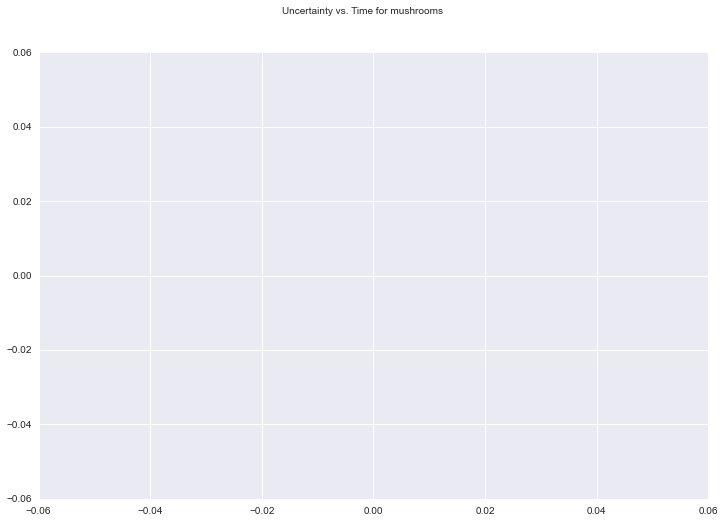

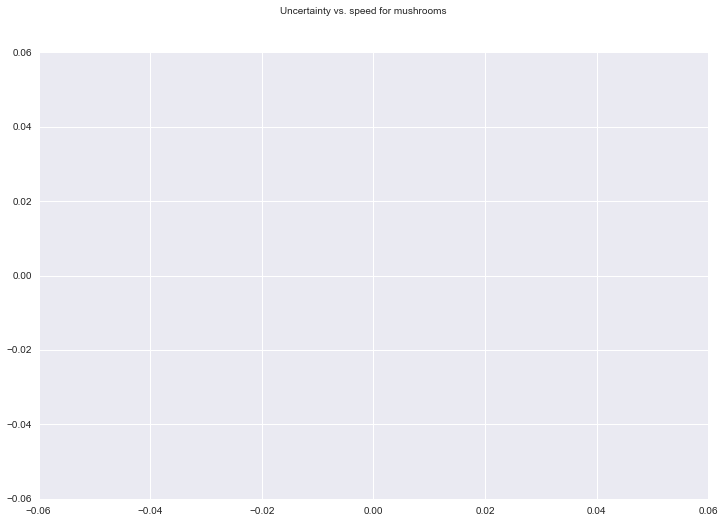

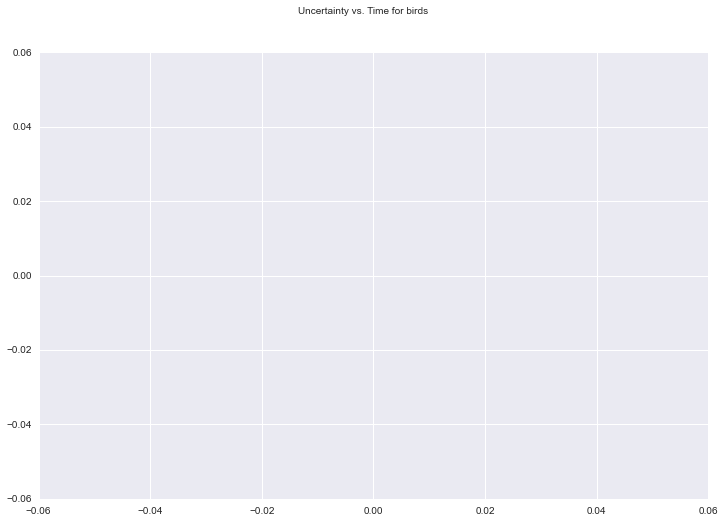

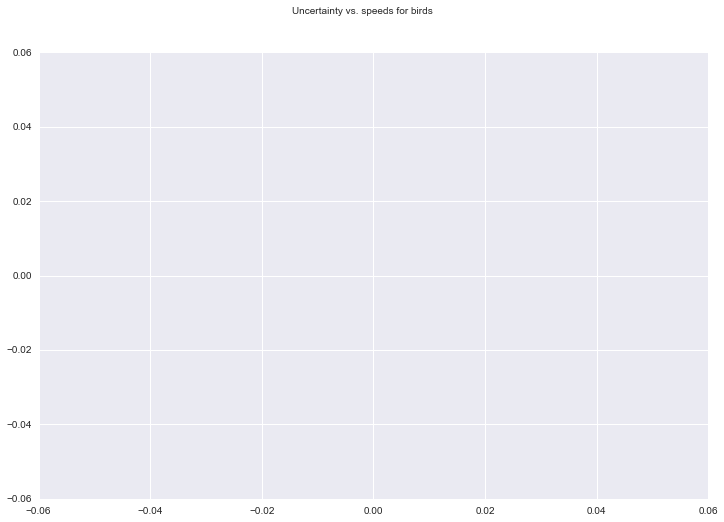

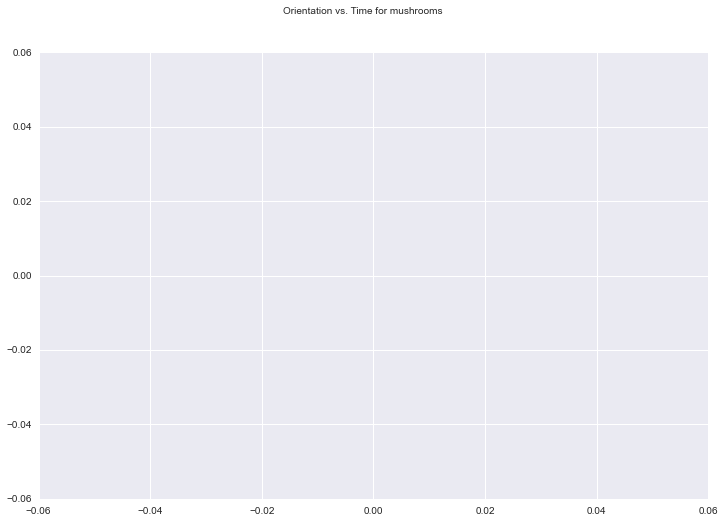

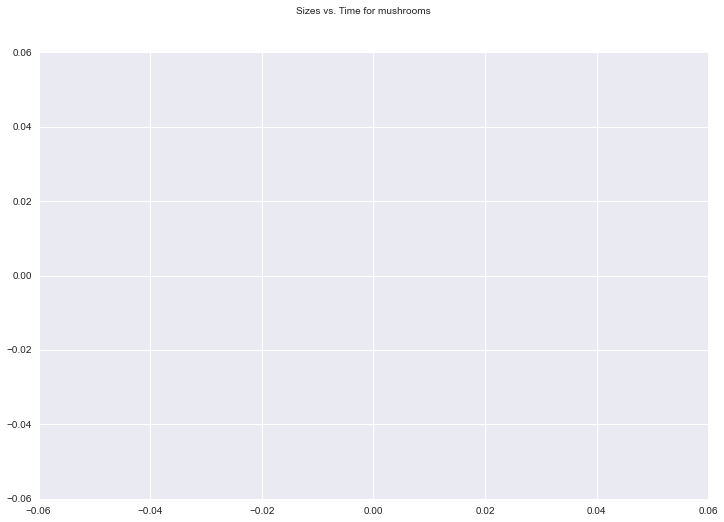

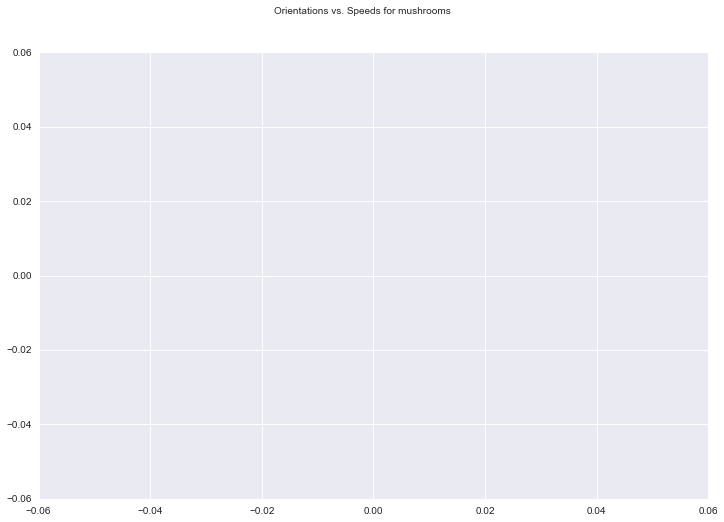

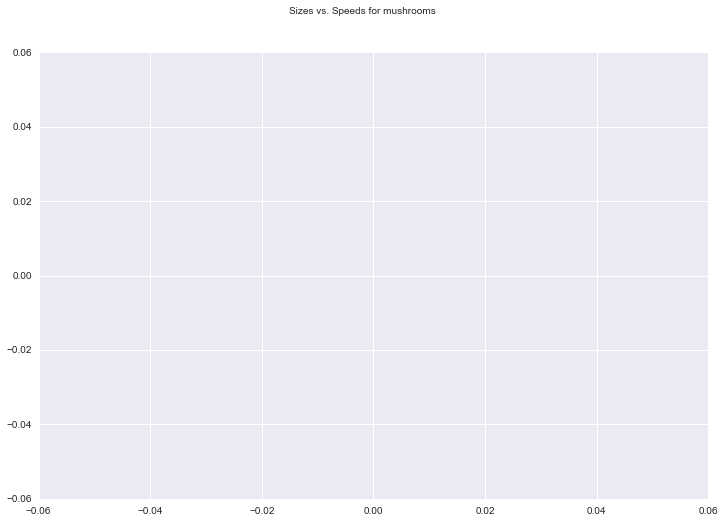

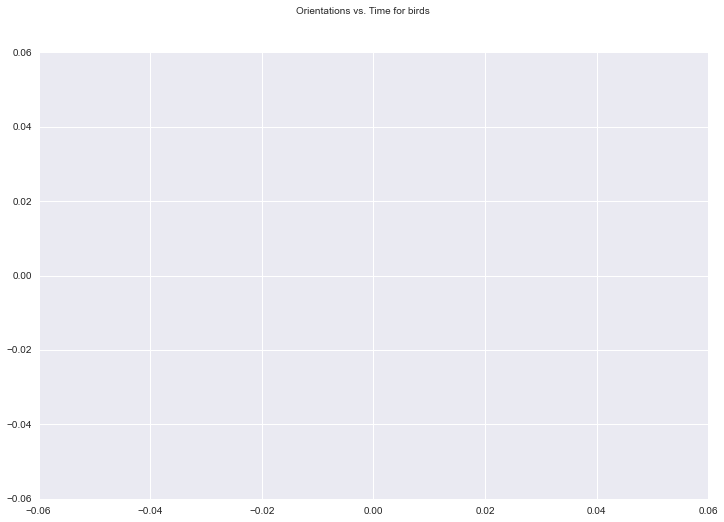

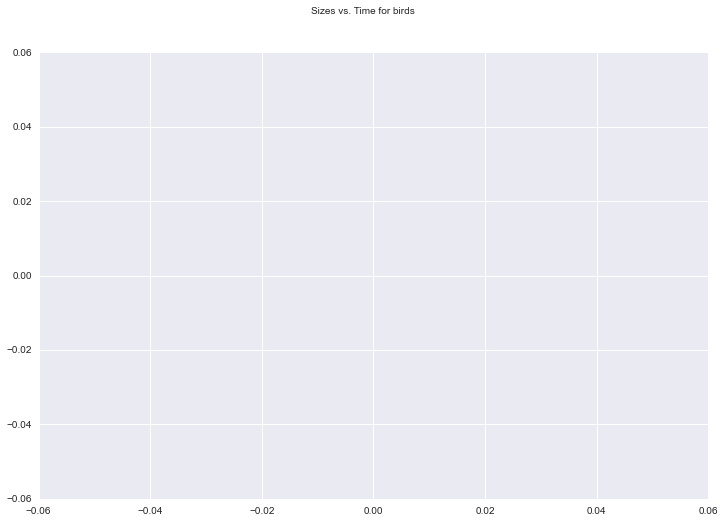

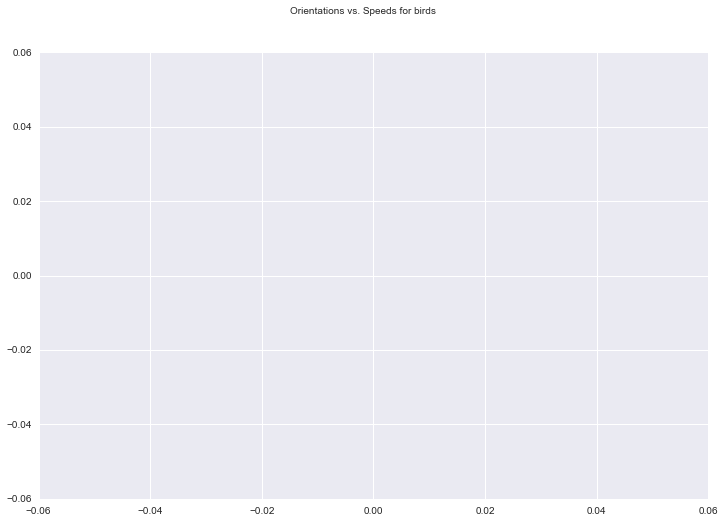

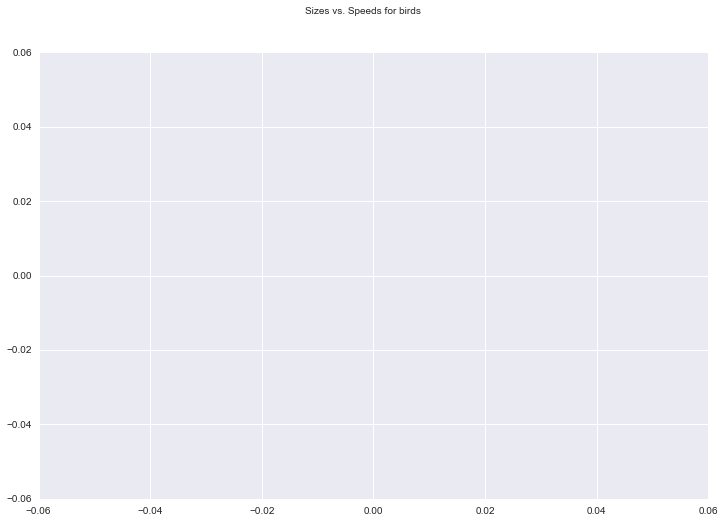

In [97]:
fig = plt.figure(figsize=(12, 8))
plt.plot(m_uncertainties, m_times, 'bo')
plt.suptitle('Uncertainty vs. Time for mushrooms')

fig = plt.figure(figsize=(12, 8))
plt.plot(m_uncertainties, m_speeds, 'bo')
plt.suptitle('Uncertainty vs. speed for mushrooms')

fig = plt.figure(figsize=(12, 8))
plt.plot(b_uncertainties, b_times, 'ro')
plt.suptitle('Uncertainty vs. Time for birds')

fig = plt.figure(figsize=(12, 8))
plt.plot(b_uncertainties, b_speeds, 'ro')
plt.suptitle('Uncertainty vs. speeds for birds')

fig = plt.figure(figsize=(12, 8))
plt.plot(m_oris, m_times, 'ro')
plt.suptitle('Orientation vs. Time for mushrooms')

fig = plt.figure(figsize=(12, 8))
plt.plot(m_sizes, m_times, 'ro')
plt.suptitle('Sizes vs. Time for mushrooms')

fig = plt.figure(figsize=(12, 8))
plt.plot(m_oris, m_speeds, 'ro')
plt.suptitle('Orientations vs. Speeds for mushrooms')

fig = plt.figure(figsize=(12, 8))
plt.plot(m_sizes, m_speeds, 'ro')
plt.suptitle('Sizes vs. Speeds for mushrooms')

fig = plt.figure(figsize=(12, 8))
plt.plot(b_oris, b_times, 'ro')
plt.suptitle('Orientations vs. Time for birds')

fig = plt.figure(figsize=(12, 8))
plt.plot(b_sizes, b_times, 'ro')
plt.suptitle('Sizes vs. Time for birds')

fig = plt.figure(figsize=(12, 8))
plt.plot(b_oris, b_speeds, 'ro')
plt.suptitle('Orientations vs. Speeds for birds')

fig = plt.figure(figsize=(12, 8))
plt.plot(b_sizes, b_speeds, 'ro')
plt.suptitle('Sizes vs. Speeds for birds')

In [ ]:
print "uncertainty vs time, mushroom", pearsonr(m_uncertainties, m_times)
print "uncertainty vs. speed, mushroom", pearsonr(m_uncertainties, m_speeds)
print "uncertainty vs time, bird", pearsonr(b_uncertainties, b_times)
print "uncertainty vs. speed, bird", pearsonr(b_uncertainties, b_speeds)

print "", pearsonr(m_oris, m_times)
print "", pearsonr(m_oris, m_speeds)
print "", pearsonr(m_sizes, m_times)
print "", pearsonr(m_sizes, m_speeds)

print "", pearsonr(b_oris, b_times)
print "", pearsonr(b_oris, b_speeds)
print "", pearsonr(b_sizes, b_times)
print "", pearsonr(b_sizes, b_speeds)


array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.],
       [  0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
        -inf, -inf, -inf, -inf],
       [  0.,   0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
        -inf, -inf, -inf, -inf],
       [  0.,   0.,   0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
        -inf, -inf, -inf, -inf],
       [  0.,   0.,   0.,   0., -inf, -inf, -inf, -inf, -inf, -inf, -inf,
        -inf, -inf, -inf, -inf],
       [  0.,   0.,   0.,   0.,   0., -inf, -inf, -inf, -inf, -inf, -inf,
        -inf, -inf, -inf, -inf],
       [  0.,   0.,   0.,   0.,   0.,   0., -inf, -inf, -inf, -inf, -inf,
        -inf, -inf, -inf, -inf],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0., -inf, -inf, -inf, -inf,
        -inf, -inf, -inf, -inf],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -inf, -inf, -inf,
        -inf, -inf, -inf, -inf],
       [  0.,   0.,   0.,   0.,   0.,

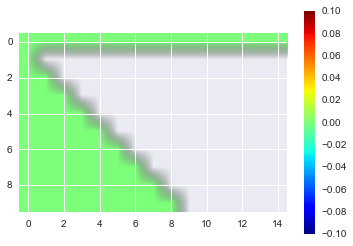

In [94]:
plt.imshow(mle)
plt.jet()
plt.colorbar()
mle